In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

In [54]:
df1 = pd.read_csv('yrs_lost_econ_data_viz.csv')
df1.head(10)

,year,state,avg_yrs_life_lost,total_yrs_life_lost,num_victims_killed,region,pce_per_capita,birth_rate,unemp_rate,gdp_per_capita
0,2006,AZ,53.21,478.9,9,Southwest,30543.0,16.99,4.3,32227.81
1,2006,CA,48.31,966.2,20,West,32680.0,15.61,4.9,39744.53
2,2006,CT,57.34,286.7,5,Northeast,38604.0,11.89,4.4,49358.64
3,2006,FL,61.08,244.3,4,South,33104.0,13.03,2.5,32636.88
4,2006,GA,50.11,400.9,8,South,28633.0,16.23,5.1,35032.64
5,2006,IA,49.86,249.3,5,Midwest,27974.0,13.61,3.7,33875.34
6,2006,IN,49.13,736.9,15,Midwest,27862.0,14.00,5.0,32385.43
7,2006,KS,50.04,500.4,10,Midwest,29515.0,14.83,4.4,32622.10
8,2006,KY,69.78,279.1,4,South,26454.0,13.81,5.7,28723.81
9,2006,LA,36.65,806.3,22,South,27330.0,14.73,4.1,38148.75


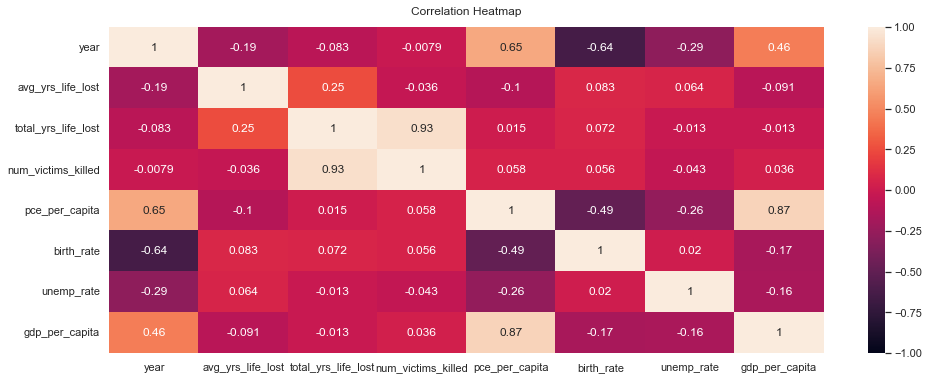

In [55]:
corr = df1.corr(method='pearson')
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Economic Data Linear Regeresion I

In [56]:
formula2 = 'total_yrs_life_lost ~  gdp_per_capita + num_victims_killed + pce_per_capita + unemp_rate + pce_per_capita + state + region'

model2 = sm.ols(formula = formula2, data = df1).fit()
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     total_yrs_life_lost   R-squared:                       0.899
Model:                             OLS   Adj. R-squared:                  0.878
Method:                  Least Squares   F-statistic:                     42.64
Date:                 Wed, 08 Feb 2023   Prob (F-statistic):           1.93e-95
Time:                         13:45:32   Log-Likelihood:                -1790.9
No. Observations:                  295   AIC:                             3686.
Df Residuals:                      243   BIC:                             3877.
Df Model:                           51                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              6

In [57]:
print("Mean Squared Error : " , model2.mse_resid)
print('Explained Variance : ', model2.rsquared)

Mean Squared Error :  13325.624856362656
Explained Variance :  0.8994811099530476


### Economic Data Linear Regression II (Cross Validation)

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold


# Encode the categorical variable using one-hot encoding
df = pd.get_dummies(df1, columns=['state','region'], drop_first=True)

# Split the data into predictor variables (X) and target variable (y)
X = df.drop('total_yrs_life_lost', axis=1)
y = df['total_yrs_life_lost']

# Initialize the KFold cross-validator
kf = KFold(n_splits=10)

# Initialize a list to store the cross-validation scores
scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the OLS model on the training data
    model = sm.OLS(y_train, X_train).fit()

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = np.mean((y_test - y_pred)**2)
    scores.append(mse)

In [59]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     total_yrs_life_lost   R-squared:                       0.961
Model:                             OLS   Adj. R-squared:                  0.951
Method:                  Least Squares   F-statistic:                     96.65
Date:                 Wed, 08 Feb 2023   Prob (F-statistic):          1.21e-122
Time:                         13:45:32   Log-Likelihood:                -1494.8
No. Observations:                  266   AIC:                             3100.
Df Residuals:                      211   BIC:                             3297.
Df Model:                           54                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                   4.6

In [60]:
# Calculate the mean score across all folds
mean_score = np.mean(scores)
print("Mean Squared Error:", mean_score)
print("Explained Variance: ",model.rsquared)

Mean Squared Error: 88458.98873571095
Explained Variance:  0.9611416391760504


### Economic Data Linear Regression III (Reduced model)

In [67]:
formula1 = 'total_yrs_life_lost ~   gdp_per_capita + num_victims_killed ' # pce_per_capita + + unemp_rate + + pce_per_capita

model1 = sm.ols(formula = formula1, data = df1).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     total_yrs_life_lost   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.873
Method:                  Least Squares   F-statistic:                     1014.
Date:                 Wed, 08 Feb 2023   Prob (F-statistic):          3.65e-132
Time:                         13:45:58   Log-Likelihood:                -1824.0
No. Observations:                  295   AIC:                             3654.
Df Residuals:                      292   BIC:                             3665.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.0

In [68]:
print("Mean Squared Error:", model1.mse_resid)
print("Explained Variance: ",model1.rsquared)

Mean Squared Error: 13880.537796855286
Explained Variance:  0.874181943488802


###  Random forest regressor

In [69]:
df1 = pd.get_dummies(df1)
# Display the first 5 rows of the last 12 columns
df1.head(5)

,year,avg_yrs_life_lost,total_yrs_life_lost,num_victims_killed,pce_per_capita,birth_rate,unemp_rate,gdp_per_capita,state_AK,state_AL,...,state_VT,state_WA,state_WI,state_WV,state_WY,region_Midwest,region_Northeast,region_South,region_Southwest,region_West
0,2006,53.21,478.9,9,30543.0,16.99,4.3,32227.81,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,48.31,966.2,20,32680.0,15.61,4.9,39744.53,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2006,57.34,286.7,5,38604.0,11.89,4.4,49358.64,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,61.08,244.3,4,33104.0,13.03,2.5,32636.88,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,50.11,400.9,8,28633.0,16.23,5.1,35032.64,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# X = df1.drop(columns=['total_yrs_life_lost']) #'avg_yrs_life_lost',
# y = df1.total_yrs_life_lost 
X = df1.drop(columns=['total_yrs_life_lost','avg_yrs_life_lost']) 
y = df1.total_yrs_life_lost 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score, r2_score

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

model = RandomForestRegressor(n_estimators= 30, random_state= 30, max_depth= 3)
rf = model.fit(X_train, y_train)


## train accuracy
y_train_pred = rf.predict(X_train)
print("The train MAE is %.2f"% mean_absolute_error(y_train,y_train_pred))
print("The train RMSE is %.2f"% mean_squared_error(y_train,y_train_pred)**0.5)
print("The train EVS is %.2f"% explained_variance_score(y_train,y_train_pred))

## test data accuracy
y_test_pred = rf.predict(X_test)
print("The test MAE is %.2f"% mean_absolute_error(y_test,y_test_pred))
print("The test RMSE is %.2f"% mean_squared_error(y_test,y_test_pred)**0.5)
print("The test EVS is %.2f"% explained_variance_score(y_test,y_test_pred))


The train MAE is 75.30
The train RMSE is 102.54
The train EVS is 0.90
The test MAE is 83.14
The test RMSE is 127.90
The test EVS is 0.88


In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

In [73]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin' 

In [ ]:

# # Visualize the first tree in the Random Forest
# tree_index = 2
# plt.figure(figsize=(20,10))
# plot_tree(rf.estimators_[tree_index], feature_names=X.columns, filled=True)
# plt.show()

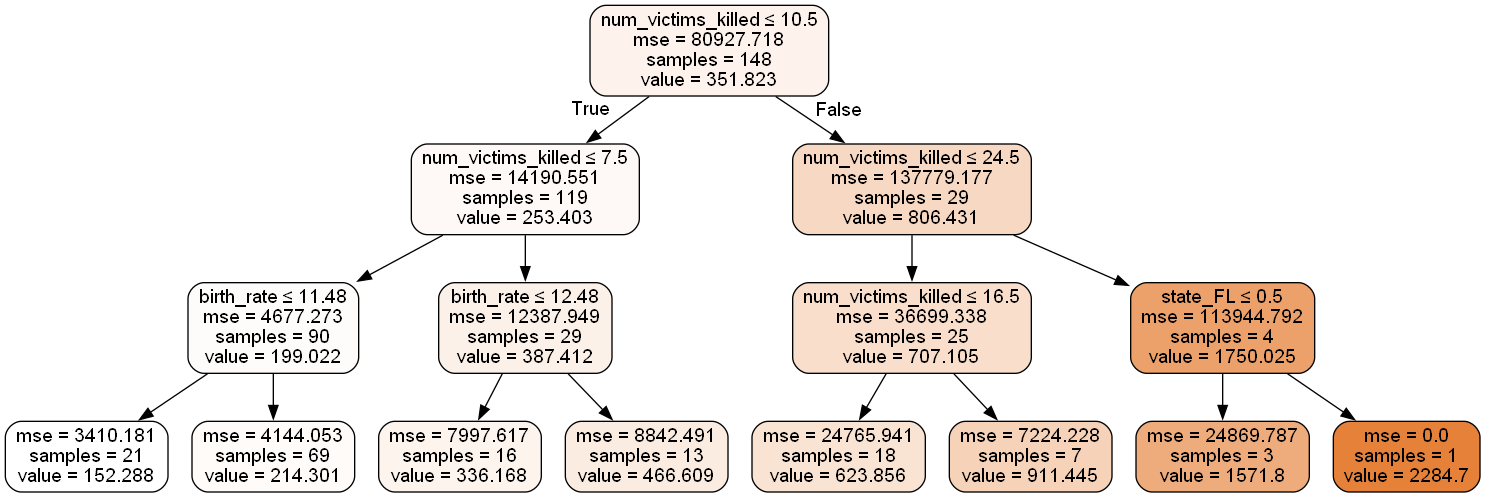

In [74]:
# Create the DOT file for the decision tree
dot_data = export_graphviz(rf.estimators_[3], out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

# Visualize the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

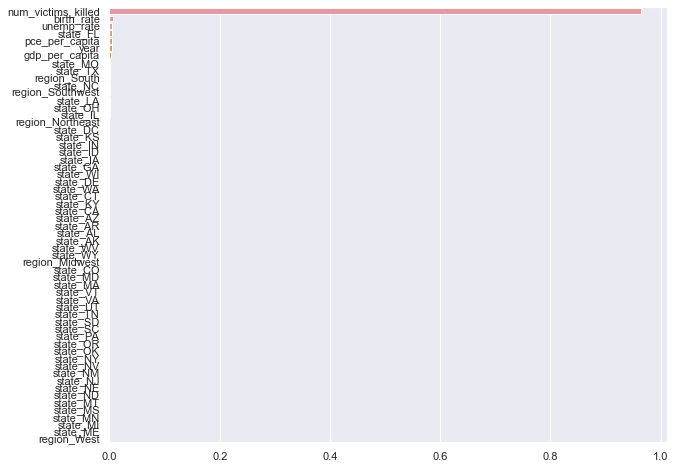

In [75]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns[indices]

sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x=importance[indices], y=feature_names) 

plt.show()